# Imports

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from datetime import datetime
import matplotlib.dates as dates
import numpy as np

# Preparing Data

- merge year,month to datetime
- create subset with date and total
- set date as index 
- delete duplicates
- sort
- group by month and sum totals

In [549]:
df = pd.read_csv('air-passenger-traffic-per-month-port-authority-of-ny-nj-beginning-1977-1.csv')
df = df.drop_duplicates()

In [701]:
df.head()

,Airport Code,Year,Month,Domestic Passengers,International Passengers,Total Passengers,Date
0,ACY,2015,Feb,96431,65,96496,2015-02-01
1,ACY,2015,Aug,108700,1932,110632,2015-08-01
2,ACY,2015,Sep,82268,315,82583,2015-09-01
3,ACY,2015,Jan,98177,90,98267,2015-01-01
4,ACY,2015,Jul,109247,1894,111141,2015-07-01


In [608]:
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "/" + df["Month"].astype(str))

In [660]:
df2 = df[['Date', 'Total Passengers']].copy()

In [661]:
df2.head(3)

,Date,Total Passengers
0,2015-02-01,96496
1,2015-08-01,110632
2,2015-09-01,82583


In [662]:
df2.set_index('Date',inplace = True)

In [663]:
df2.sort_index(inplace=True)
df2=df2.drop_duplicates()
df2.head()

,Total Passengers
Date,
1977-01-01,1093062
1977-01-01,1487588
1977-01-01,541295
1977-02-01,1237719
1977-02-01,510490


In [664]:
df2 = df2.groupby([df2.index]).sum()

In [702]:
df2.head()

,Total Passengers
Date,
1977-01-01,3121945
1977-02-01,2769063
1977-03-01,3254605
1977-04-01,3492036
1977-05-01,3563483


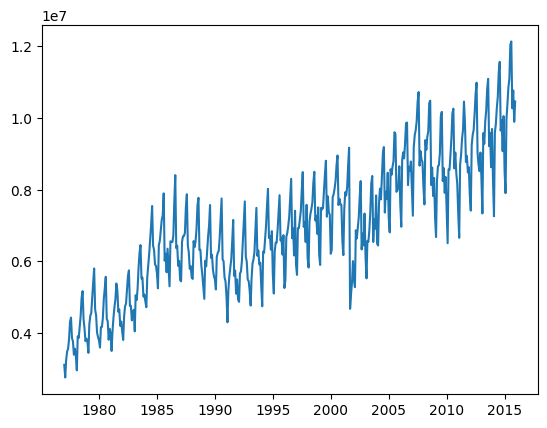

In [666]:
plt.plot(df2)

# Decomposition

In [667]:
stl = STL(df2)
result = stl.fit()

In [668]:
seasonal,trend,resid = result.seasonal,result.trend,result.resid

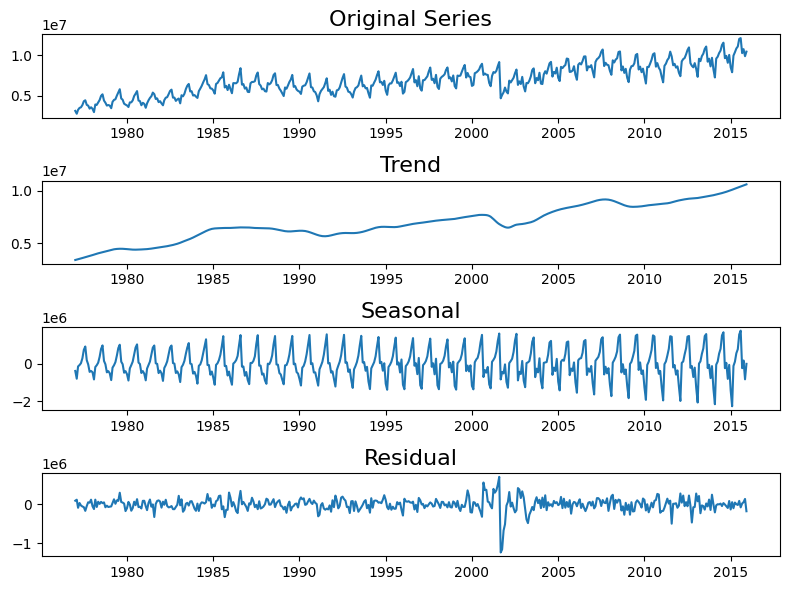

In [669]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df2)
plt.title('Original Series',fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend',fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal',fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual',fontsize=16)

plt.tight_layout()

# TREND + SEASONAL = ESTIMATED | RESIDUAL IS WHAT'S LEFT (MESS)

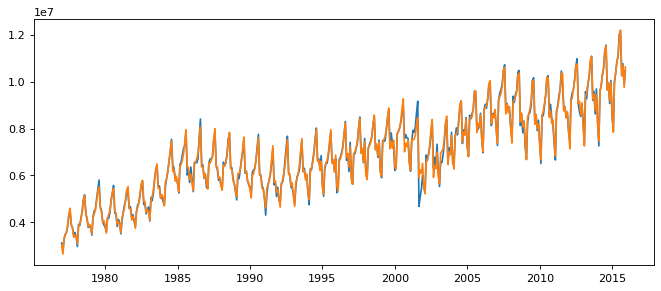

In [687]:
estimated = trend+seasonal
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(df2)
plt.plot(estimated)

# ANOMALY DETECTION

In [688]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(2557.0, 16648.0)

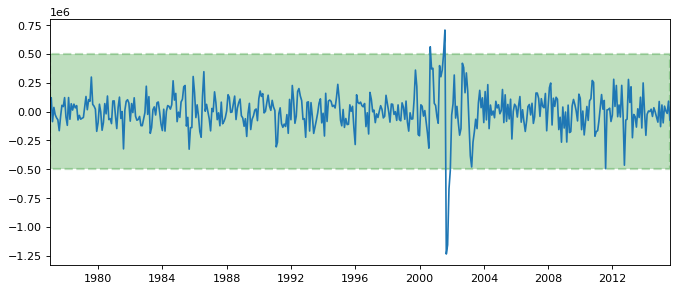

In [691]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(resid)

plt.fill_between([datetime(1977,1,1), datetime(2015,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(1977,1,1), datetime(2015,8,1))

In [692]:
anomalies = df2[(resid<lower) | (resid>upper)]

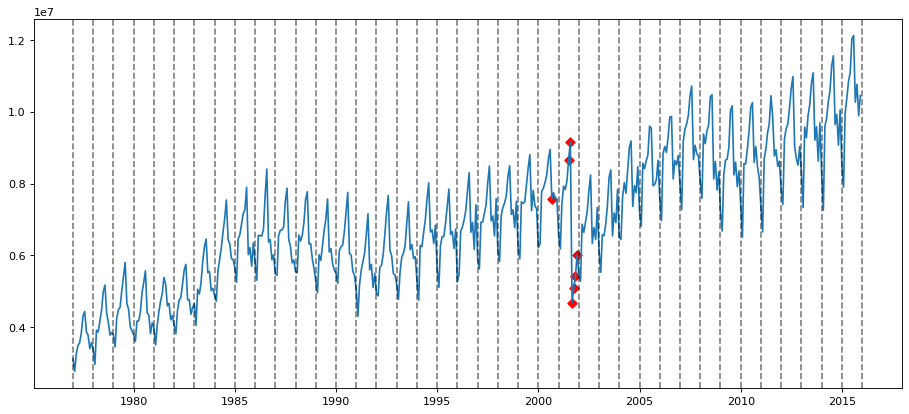

In [699]:
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(df2)
for year in range(1977,2017):
    plt.axvline(datetime(year,1,1),color='k',linestyle='--', alpha=0.5)

plt.scatter(anomalies.index,anomalies['Total Passengers'],color='r',marker='D')

In [700]:
anomalies

,Total Passengers
Date,
2000-09-01,7571024
2001-07-01,8658108
2001-08-01,9167123
2001-09-01,4679812
2001-10-01,5089994
2001-11-01,5420828
2001-12-01,6010760
